<h1>Support Vector Machines (SVM) </h1>
<p>
Support Vector Machines (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. In this explanation, I'll focus on binary classification using SVM. The main idea behind SVM is to find the optimal hyperplane that separates the data into different classes while maximizing the margin between the two classes.

Let's go through the steps of implementing SVM for binary classification using Python and the popular machine learning library, scikit-learn.</p>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


<p>Step 2: Load the dataset
For this example, let's use the Iris dataset from scikit-learn. We'll only consider two features for simplicity and visualization purposes.</p>

In [3]:
# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Considering only the first two features for visualization
y = (iris.target != 0) * 1  # Convert the target to binary: 1 for class 1 (Versicolor) and 0 for others


<p>Step 3: Split the data into training and testing sets</p>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<p>Step 4: Train the SVM model</p>

In [5]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the model on the training data
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

Step 5: Make predictions and evaluate the model

In [6]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 1.0
Confusion Matrix:
[[10  0]
 [ 0 20]]


Step 6: Visualize the decision boundary
To visualize the decision boundary, we'll plot the data points and the hyperplane determined by the SVM model.

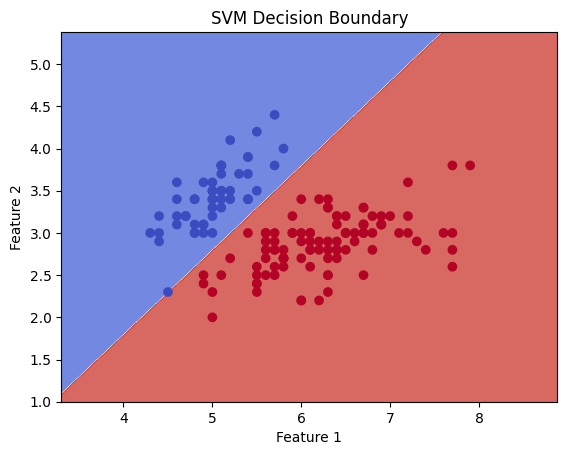

In [7]:
# Create a mesh to plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain the decision boundary for each point in the mesh
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()
